# Recommender system
## Due date: January 2020
## Participants: Sai, Audry, Tammie, Kee, Noemie

### PART 1: Exploratory Data Analysis & Visualization

In [35]:
# Pandas is an open source Python library that offers data structures and data analysis tools and operations. 
# Read more at: https://pandas.pydata.org/
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

7 datasets:
- interactions_test
- interactions_train
- interactons_validation
- PP_recies
- PP_users
- RAW_interactions
- RAW_recipes

#### Dataset RAW_recipes

In [306]:
# Import the data RAW_recipes
RAW_recipes = pd.read_csv("C:/Users/U597910/Downloads/recommender_system/RAW_recipes.csv")
# Dimensions of our dataframe
print(RAW_recipes.shape)
# missing values (1 name and description, not super important)
print(RAW_recipes.isnull().sum())
# 5 first rows of the dataframe
RAW_recipes.head()

(231637, 12)
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [305]:
# name (of the recipe)
print(RAW_recipes['name'].nunique())

duplicated_names = RAW_recipes.name[RAW_recipes.name.duplicated()]
print(duplicated_names)



230185
600                  cream  of mushroom soup
846                             10 bean soup
1314                      3 bean baked beans
1315                            3 bean salad
1335      3 ingredient peanut butter cookies
                         ...                
231519               zucchini carrot muffins
231524       zucchini chocolate chip muffins
231526                 zucchini cilantro dip
231536                   zucchini lime bread
231537                    zucchini oat bread
Name: name, Length: 1451, dtype: object
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
nutrition1           0
nutrition2           0
nutrition3           0
nutrition4           0
nutrition5           0
nutrition6           0
nutrition7           0
dtype: int64


In [192]:
# id (of the recipe)
print(RAW_recipes['id'].nunique())

231637


888
count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf9bcd0388>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf9ada9b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf9c598a08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf96a7c348>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf9e120a48>],
 'means': []}

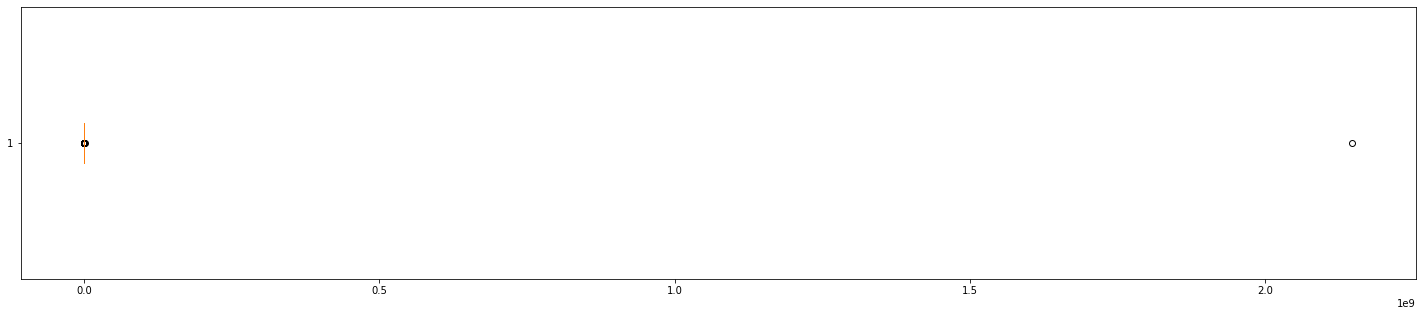

In [205]:
# minutes (to prepare the recipe)
print(RAW_recipes['minutes'].nunique())

print(RAW_recipes['minutes'].describe())

plt.boxplot(RAW_recipes.minutes,vert=False)

# clean to do on minutes 

In [219]:
# contributor_id
print(RAW_recipes['contributor_id'].nunique())

contributor_group = RAW_recipes.groupby(['contributor_id']).size()
print(contributor_group.sort_values(ascending=False))
print(contributor_group.describe())

27926
contributor_id
89831     3118
37779     2553
37449     2493
1533      1595
58104     1522
          ... 
558981       1
559087       1
559135       1
559289       1
378000       1
Length: 27926, dtype: int64
count    27926.000000
mean         8.294672
std         49.108016
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3118.000000
dtype: float64


5090
submitted
1999-08-06    13
1999-08-07    10
1999-08-08     8
1999-08-09    21
1999-08-10    18
              ..
2018-11-10     2
2018-11-12     1
2018-11-16     1
2018-11-28     1
2018-12-04     1
Length: 5090, dtype: int64
1999-08-06
2018-12-04


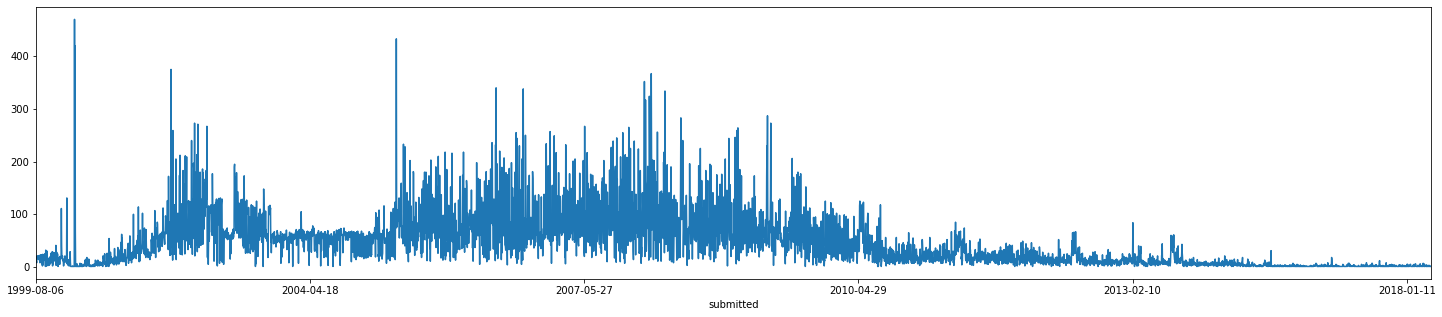

In [223]:
# submitted (date of the recipe)
print(RAW_recipes['submitted'].nunique())

submitted_group = RAW_recipes.groupby('submitted')
print(submitted_group.size())
submitted_group.size().plot.line()

print(min(RAW_recipes.submitted))
print(max(RAW_recipes.submitted))

plt.rcParams['figure.figsize'] = [25, 5]

# should merge with a real calendar so that missin dates are set to 0


In [248]:
# tags (to get the recipe)
print(RAW_recipes['tags'].nunique())
print(RAW_recipes['tags'].head())

# gather all lists into 1 to do some statistics on tags
#import itertools
#mylist = list((RAW_recipes['tags']))
#mylist2=list(itertools.chain(*RAW_recipes['tags']))
#print(len(mylist2))

#print(mylist2[0:9])




209115
0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object
59173823
['[', "'", '6', '0', '-', 'm', 'i', 'n', 'u']


229318
count    231637.000000
mean        473.942425
std        1189.711374
min           0.000000
25%         174.400000
50%         313.400000
75%         519.700000
max      434360.200000
Name: nutrition1, dtype: float64
count    231637.00000
mean         36.08070
std          77.79884
min           0.00000
25%           8.00000
50%          20.00000
75%          41.00000
max       17183.00000
Name: nutrition2, dtype: float64
count    231637.000000
mean         84.296865
std         800.080897
min           0.000000
25%           9.000000
50%          25.000000
75%          68.000000
max      362729.000000
Name: nutrition3, dtype: float64
count    231637.000000
mean         30.147485
std         131.961589
min           0.000000
25%           5.000000
50%          14.000000
75%          33.000000
max       29338.000000
Name: nutrition4, dtype: float64
count    231637.00000
mean         34.68186
std          58.47248
min           0.00000
25%           7.00000
50%          18.00000
7

Text(0.5, 1.0, '% daily value total carbohydrate')

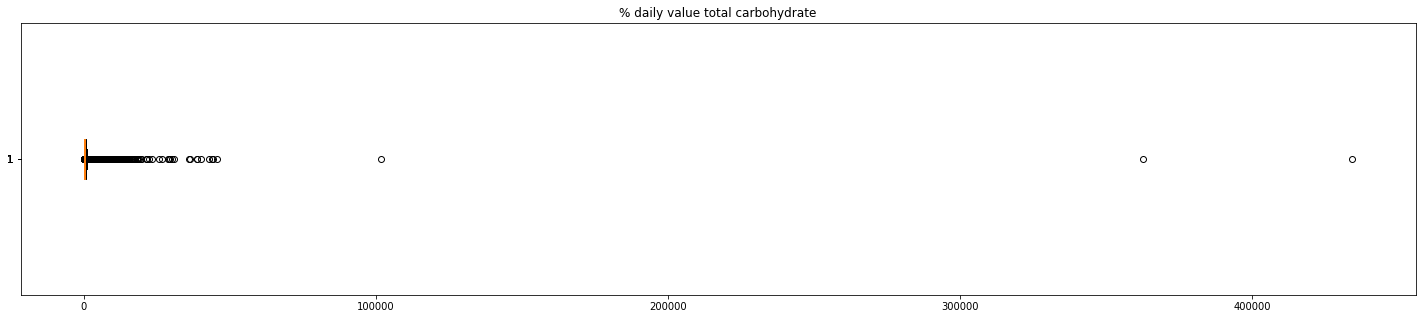

In [251]:
# nutrition (of the recipe)
print(RAW_recipes['nutrition'].nunique())

RAW_recipes2 = RAW_recipes["nutrition"].str.split(",", n = 7, expand = True)
RAW_recipes2.head()
RAW_recipes["nutrition1"]= RAW_recipes2[0] # nb of calories
RAW_recipes["nutrition2"]= RAW_recipes2[1] # % daily value total fat
RAW_recipes["nutrition3"]= RAW_recipes2[2] # % daily value sugars
RAW_recipes["nutrition4"]= RAW_recipes2[3] # % daily value sodium
RAW_recipes["nutrition5"]= RAW_recipes2[4] # % daily value protein
RAW_recipes["nutrition6"]= RAW_recipes2[5] # % daily value saturated fat
RAW_recipes["nutrition7"]= RAW_recipes2[6] # % daily value total carbohydrate

RAW_recipes.nutrition1=RAW_recipes.nutrition1.str.replace('[', '')
RAW_recipes.nutrition7=RAW_recipes.nutrition7.str.replace(']', '')

# nb of calories
print(pd.to_numeric(RAW_recipes.nutrition1).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition1),vert=False)
plt.title('Nb of calories')

# % daily value total fat
print(pd.to_numeric(RAW_recipes.nutrition2).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition2),vert=False)
plt.title('% daily value total fat')

# % daily value sugars
print(pd.to_numeric(RAW_recipes.nutrition3).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition3),vert=False)
plt.title('% daily value sugars')

# % daily value sodium
print(pd.to_numeric(RAW_recipes.nutrition4).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition4),vert=False)
plt.title('% daily value sodium')

# % daily value protein
print(pd.to_numeric(RAW_recipes.nutrition5).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition5),vert=False)
plt.title('% daily value protein')

# % daily value saturated fat
print(pd.to_numeric(RAW_recipes.nutrition6).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition6),vert=False)
plt.title('% daily value saturated fat')

# % daily value total carbohydrate
print(pd.to_numeric(RAW_recipes.nutrition7).describe())
plt.boxplot(pd.to_numeric(RAW_recipes.nutrition7),vert=False)
plt.title('% daily value total carbohydrate')

# cleaning to do
# probably only 1st column to keep



94
count       94.000000
mean      2464.223404
std       5326.894014
min          1.000000
25%          2.250000
50%         29.000000
75%       1077.500000
max      20785.000000
dtype: float64


Text(0.5, 1.0, 'Number of steps')

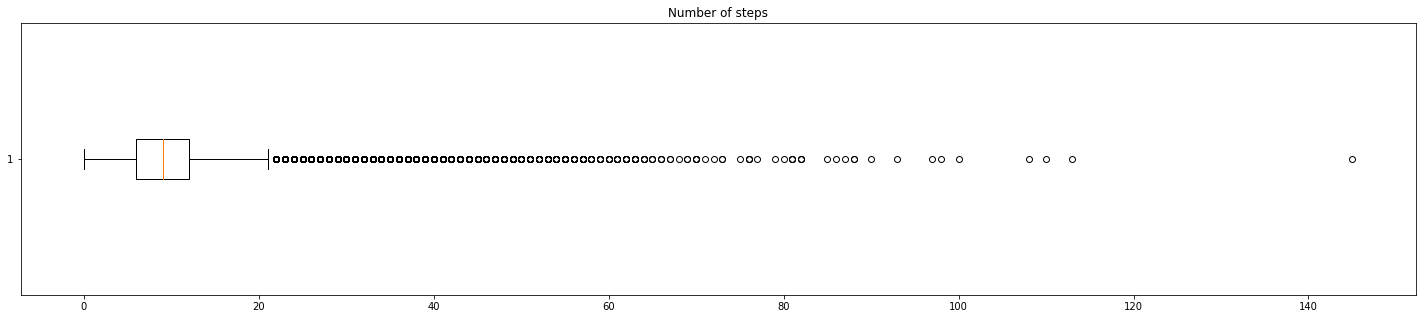

In [254]:
# n_steps (number of steps to mke the recipe)
print(RAW_recipes['n_steps'].nunique())

RAWrecipes_group = RAW_recipes.groupby('n_steps')
print(RAWrecipes_group.size().describe())
#my_plot = RAWrecipes_group.size().plot(kind='bar',legend=None,title="Number of recipes per number of steps",color='darkred')

#my_plot.set_xlabel("Number of steps")
#my_plot.set_ylabel("Number of recipes")
#my_plot.tick_params(axis='x', labelrotation=0)

plt.boxplot(RAW_recipes.n_steps,vert=False)
plt.title('Number of steps')


In [255]:
# steps (name of the steps)
print(RAW_recipes['steps'].nunique())



231074


In [256]:
# description
print(RAW_recipes['description'].nunique())



222668


In [257]:
# ingredients
print(RAW_recipes['ingredients'].nunique())

# gather all of them into 1 list to get a counting per ingredients

230475


41


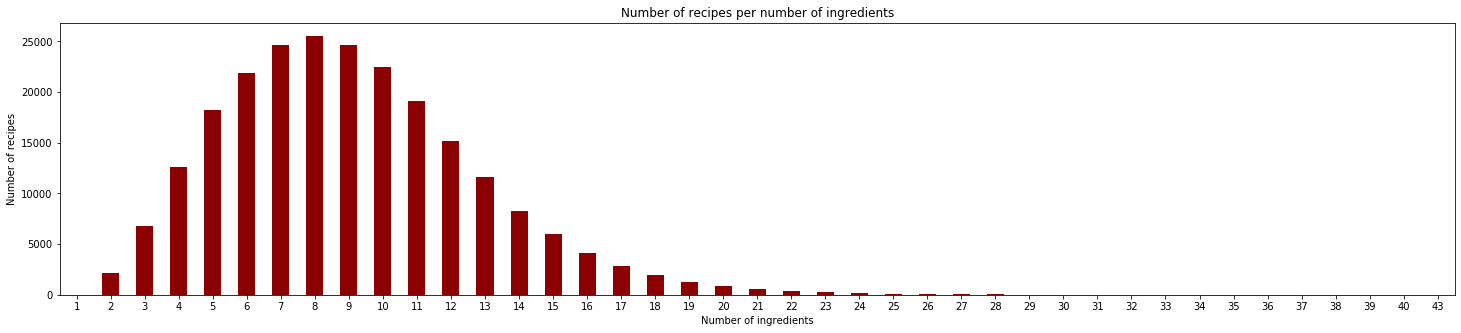

In [258]:
# n_ingredients
print(RAW_recipes['n_ingredients'].nunique())

RAWrecipes_group = RAW_recipes.groupby('n_ingredients')
my_plot = RAWrecipes_group.size().plot(kind='bar',legend=None,title="Number of recipes per number of ingredients",color='darkred')

my_plot.set_xlabel("Number of ingredients")
my_plot.set_ylabel("Number of recipes")
my_plot.tick_params(axis='x', labelrotation=0)


#### Dataset PP_recipes

In [307]:
# Import the data PP_recipes
PP_recipes = pd.read_csv("C:/Users/U597910/Downloads/recommender_system/PP_recipes.csv")
# Dimensions of our dataframe
print(PP_recipes.shape)
# missing values (nothing missing)
print(PP_recipes.isnull().sum())
# 5 first rows of the dataframe
PP_recipes.head()

(178265, 8)
id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [277]:
# id of the recipe (linked with id of the table RAW_recipes)
print(PP_recipes['id'].nunique())


#print(RAW_recipes[RAW_recipes['id']==424415])

178265


In [264]:
# i of the recipe
print(PP_recipes['i'].nunique())

# not sure of the use of this variable

178265


In [265]:
# name_tokens
print(PP_recipes['name_tokens'].nunique())

#not sure how to use it

176694


In [ ]:
# ingredient_tokens
print(PP_recipes['ingredient_tokens'].nunique())

#not sure how to use it

In [ ]:
# steps_tokens
print(PP_recipes['steps_tokens'].nunique())

#not sure how to use it

In [ ]:
# techniques
print(PP_recipes['techniques'].nunique())

#not sure how to use it

3
calorie_level
0    69699
1    63255
2    45311
dtype: int64


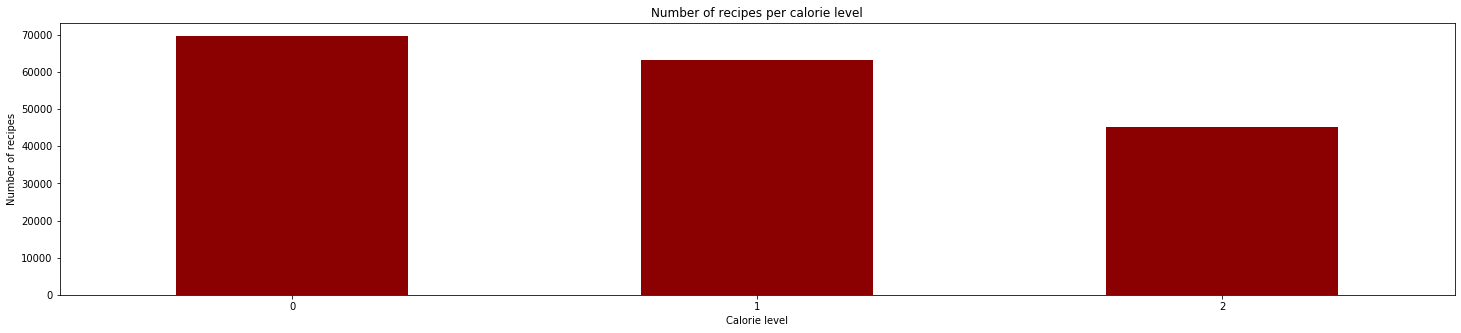

In [269]:
# calorie_level
print(PP_recipes['calorie_level'].nunique())

calorie_group = PP_recipes.groupby('calorie_level')
print(calorie_group.size())
my_plot = calorie_group.size().plot(kind='bar',legend=None,title="Number of recipes per calorie level",color='darkred')

my_plot.set_xlabel("Calorie level")
my_plot.set_ylabel("Number of recipes")
my_plot.tick_params(axis='x', labelrotation=0)

# do a merge with RAW_recipes to get the number of calories for elvel 0, 1 and 2

In [270]:
# ingredient_ids
print(PP_recipes['ingredient_ids'].nunique())


177524


#### Dataset PP_users

In [308]:
# Import the data PP_users
PP_users = pd.read_csv("C:/Users/U597910/Downloads/recommender_system/PP_users.csv")
# Dimensions of our dataframe
print(PP_users.shape)
# missing values (nothing missing)
print(PP_users.isnull().sum())
# 5 first rows of the dataframe
PP_users.head()

(25076, 6)
u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [281]:
# u (id of the user)
print(PP_users['u'].nunique())


25076


In [282]:
# techniques
print(PP_users['techniques'].nunique())


24609


In [303]:
# items
PP_users = PP_users.rename(columns={'items': 'item'})
print(PP_users['item'].nunique())



25066
[False]


In [284]:
# n_items
print(PP_users['n_items'].nunique())
print((PP_users.item.str.split(",").str.len()==PP_users.n_items).unique())

print((PP_users.techniques.str.split(",").str.len()==PP_users.n_items).unique())
# number of techniques is not equal to number of items

576
[ True]
[False  True]


In [285]:
# ratings
print(PP_users['ratings'].nunique())


10754


576
[ True]
[ True]
count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
Name: n_ratings, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1ad736c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a30c1388>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c19ea69748>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a66a6108>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a66a6048>],
 'means': []}

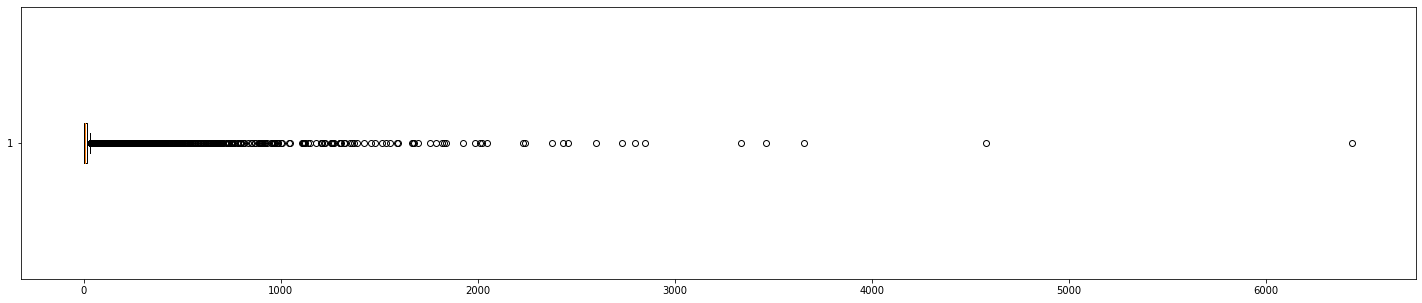

In [288]:
# n_ratings
print(PP_users['n_ratings'].nunique())

print((PP_users.ratings.str.split(",").str.len()==PP_users.n_ratings).unique())
# number of ratings is well the number of ratings

print((PP_users.n_ratings==PP_users.n_items).unique())
# number of ratings and of items are the same

print(PP_users.n_ratings.describe()) 
plt.boxplot(PP_users.n_ratings,vert=False)
# to do data cleaning

#### Dataset RAW_interactions

In [310]:
# Import the data RAW_interactions
RAW_interactions = pd.read_csv("C:/Users/U597910/Downloads/recommender_system/RAW_interactions.csv")
# Dimensions of our dataframe
print(RAW_interactions.shape)
# missing values (a few reviews, not too bad)
print(RAW_interactions.isnull().sum())
# 5 first rows of the dataframe
RAW_interactions.head()

(1132367, 5)
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


226570
count    226570.000000
mean          4.997868
std          49.663111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        7671.000000
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1c16cdd3348>,
 'caps': [<matplotlib.lines.Line2D at 0x1c16bd28308>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c16c7d61c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c19574fa08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1969792c8>],
 'means': []}

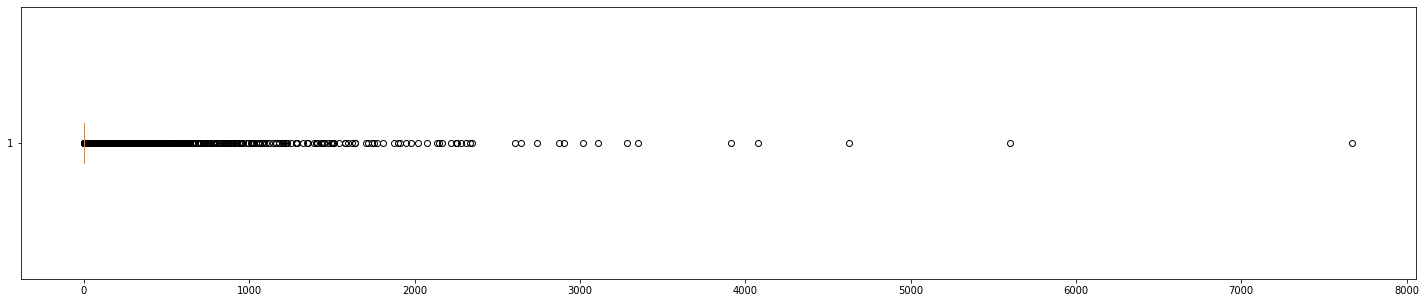

In [290]:
# user_id
print(RAW_interactions['user_id'].nunique())

RAWinteractions_group = RAW_interactions.groupby('user_id')
print(RAWinteractions_group.size().describe())
plt.boxplot(RAWinteractions_group.size(),vert=False)


231637
count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a7218488>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a6469508>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a68e2e08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bff102d148>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfb532cd08>],
 'means': []}

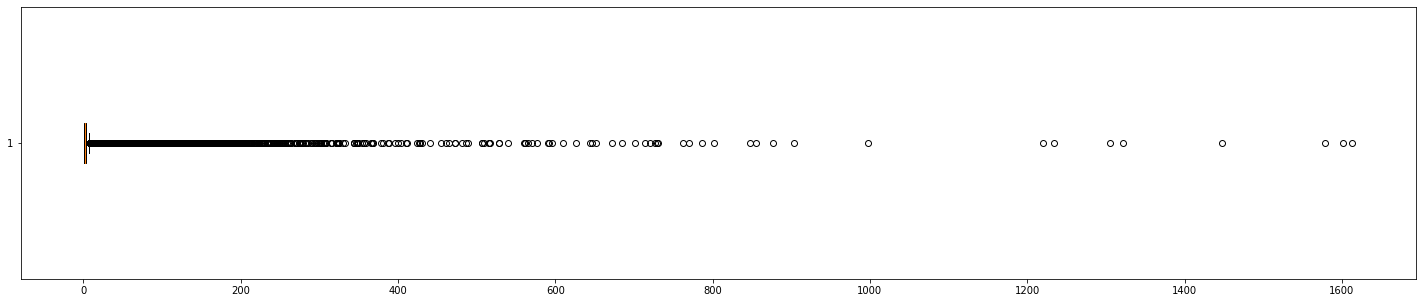

In [291]:
# recipe_id
print(RAW_interactions['recipe_id'].nunique())

RAWinteractions_group = RAW_interactions.groupby('recipe_id')
print(RAWinteractions_group.size().describe())
plt.boxplot(RAWinteractions_group.size(),vert=False)


2000-01-25
2018-12-20
date
2000-01-25     2
2000-02-25     3
2000-03-13     2
2000-04-07     1
2000-05-21     1
              ..
2018-12-16    43
2018-12-17    30
2018-12-18    31
2018-12-19    17
2018-12-20     1
Length: 6396, dtype: int64


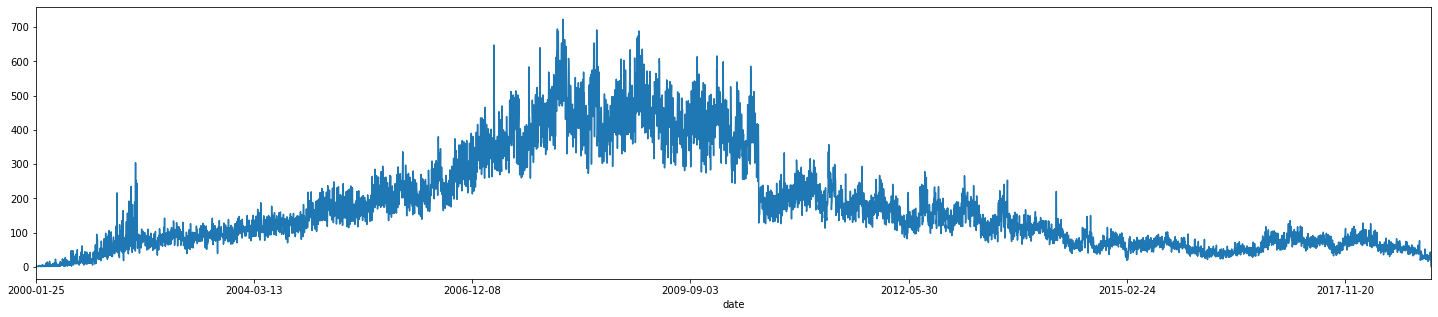

In [293]:
# date
print(min(RAW_interactions.date))
print(max(RAW_interactions.date))

RAWinteractions_group = RAW_interactions.groupby('date')
print(RAWinteractions_group.size())
RAWinteractions_group.size().plot.line()
plt.rcParams['figure.figsize'] = [25, 5]

# to merge with real dates and redo the plot (because there are missing dates)
# missing dates here -> put some dates to 0)

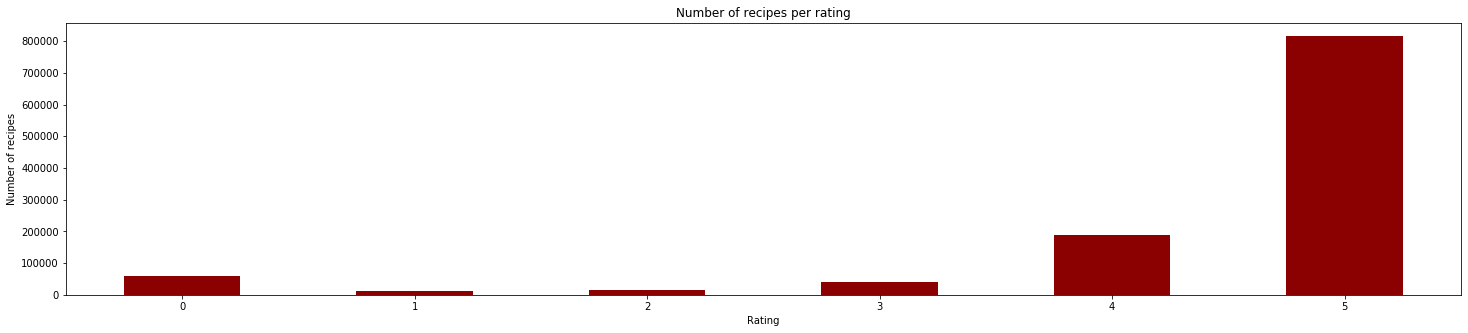

In [294]:
# rating
RAWinteractions_group = RAW_interactions.groupby('rating')

my_plot = RAWinteractions_group.size().plot(kind='bar',legend=None,title="Number of recipes per rating",color='darkred')

my_plot.set_xlabel("Rating")
my_plot.set_ylabel("Number of recipes")
my_plot.tick_params(axis='x', labelrotation=0)



In [ ]:
# review

#### Dataset interactions_train

In [312]:
# Import the data interactions_train
interactions_train = pd.read_csv("C:/Users/U597910/Downloads/recommender_system/interactions_train.csv")
# Dimensions of our dataframe
print(interactions_train.shape)
# missing values (nothing)
print(interactions_train.isnull().sum())
# 5 first rows of the dataframe
interactions_train.head()

(698901, 6)
user_id      0
recipe_id    0
date         0
rating       0
u            0
i            0
dtype: int64


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [300]:
# user_id
print(interactions_train['user_id'].nunique())

userid_group = interactions_train.groupby('user_id')
print(userid_group.describe())



25076
           recipe_id                                                     \
               count           mean            std       min        25%   
user_id                                                                   
1533           115.0   49015.452174   33892.654468    2137.0   24013.50   
1535           649.0  122917.338983  104133.294513     834.0   46072.00   
1634            48.0   45380.791667   55407.134982    3624.0   11912.25   
1676            24.0  108432.125000   79687.021574     825.0   35979.00   
1773             2.0    3856.500000    5060.763233     278.0    2067.25   
...              ...            ...            ...       ...        ...   
2002204415       2.0  235781.500000  294967.472452   27208.0  131494.75   
2002214643       2.0  219807.000000  159390.353761  107101.0  163454.00   
2002227190       3.0  205925.000000  108244.176236   86125.0  160541.50   
2002254807       5.0   74256.800000   56834.647164   26849.0   27520.00   
2002312797       2.

In [ ]:
# recipe_id
print(interactions_train['recipe_id'].nunique())



In [ ]:
# date
print(interactions_train['date'].nunique())



In [ ]:
# rating
print(interactions_train['rating'].nunique())



In [ ]:
# u
print(interactions_train['u'].nunique())



In [ ]:
# i
print(interactions_train['i'].nunique())


In [ ]:
# Drop some columns because no information (so make the ataframe lighter)
data2 = data.drop(columns=['xxx','xxx'])
# Check the dimensions of the new dataframe
data2.shape

In [ ]:
# Drop duplicate xxxx
data3 = data2.drop_duplicates('xxx')
# Check the dimensions of the new dataframe
data3.shape

In [ ]:
# Check the number of rows and columns dropped
data.shape-data3.shape

In [ ]:
# Look at missing values 
#drop rows with NaN price, points and description
wine_df = wine_df.dropna(subset=['price', 'points', 'description'])
#Also we will drop any empty values
wine_df = wine_df.dropna()
wine_df.shape

In [ ]:
print(wine_df['description'].groupby(wine_df['taster_name']).count().sort_values(ascending = False))

In [63]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
# sample text for performing tokenization
text = 'In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America'
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\U597910/nltk_data'
    - 'C:\\Users\\U597910\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\U597910\\AppData\\Local\\Continuum\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\U597910\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\U597910\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


### PART 2: 

### PART 3 : 

### PART 4 : 